In [14]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import email  
import re  
from collections import Counter  

# Preprocessing 

In [7]:
# Load stop words
with open("C:\\Users\\jjadr\\Documents\\4TH YEAR\\CMSC 197 - Machine Learning\\hw4-adricula\\stop_words.txt") as f:
    stop_words = f.read().splitlines()
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',


In [17]:
# Dataframe columns 
labels = {'folder':[], 'category':[]}

# Load labels 
with open("C:\\Users\\jjadr\\Documents\\4TH YEAR\\CMSC 197 - Machine Learning\\hw4-adricula\\labels.txt") as f:
    for line in f:
        value, key = line.split()
        if value == 'ham':
            # set label of ham to 0
            labels['folder'].append(key.replace("../data/",""))
            labels['category'].append(0)
        elif value == 'spam':
            # set label of spam to 1
            labels['folder'].append(key.replace("../data/",""))
            labels['category'].append(1)

df_labels = pd.DataFrame.from_dict(labels)
df_labels

,folder,category
0,000/000,0
1,000/001,1
2,000/002,1
3,000/003,0
4,000/004,1
...,...,...
37817,126/017,1
37818,126/018,1
37819,126/019,1
37820,126/020,1


In [19]:
# Clean emails and removing stop words 
def clean_data(body):
    storage = []   # Store the cleaned words
    for word in message.split():
        var = re.sub('<[^<>]+>','', word)  # Remove html tags
        var = re.sub('[^a-z]','', var)  # Remove special characters and numbers
        if var != "" and var not in stop_words: # Remove words in stop words  
            storage.append(var)

    new_list = " ".join(storage)  # change message to a string format
    return new_list         # return cleaned email message

In [21]:
body = {'folder':[], 'body':[]}

# Open folders to access body of email 
for path in df_labels['folder']:
    body['folder'].append(path)
    # Default encoding is set to ISO-8859-1
    with open(f"C:\\Users\\jjadr\\Documents\\4TH YEAR\\CMSC 197 - Machine Learning\\hw4-adricula\\data\\{path}", encoding='ISO-8859-1') as f:
        message = ""   # Store the email 
        email_message = email.message_from_file(f) 

        # Multipart email 
        if email_message.is_multipart():
            for payload in email_message.walk():
                # If current message is text or plain 
                if payload.get_content_type() == "text/plain": 
                    # Set the message to lowercase 
                    message = payload.get_payload().lower()  
                    break
        else:
            message = email_message.get_payload().lower()
        
        # Clean email 
        new_list = clean_data(message)
        body['body'].append(new_list)

In [23]:
# Shows the email's body
df_body = pd.DataFrame.from_dict(body)
df_body

,folder,body
0,000/000,mailing list queried weeks ago running set arc...
1,000/001,luxury watches buy rolex rolex cartier bvlgari...
2,000/002,academic qualifications prestigious nonacc red...
3,000/003,greetings verify subscription planfans list ch...
4,000/004,chauncey conferred luscious continued tonsillitis
...,...,...
37817,126/017,great news expec ted infinex ventures infx pri...
37818,126/018,oil sector going crazy weekly gift kkpt thing ...
37819,126/019,httpvdtobjdocscaninfo suffering pain depressio...
37820,126/020,prosperous future increased money earning powe...


In [25]:
# Shows results with category (0 or 1)
df_results = pd.merge(df_labels, df_body, on='folder')
df_results 

,folder,category,body
0,000/000,0,mailing list queried weeks ago running set arc...
1,000/001,1,luxury watches buy rolex rolex cartier bvlgari...
2,000/002,1,academic qualifications prestigious nonacc red...
3,000/003,0,greetings verify subscription planfans list ch...
4,000/004,1,chauncey conferred luscious continued tonsillitis
...,...,...,...
37817,126/017,1,great news expec ted infinex ventures infx pri...
37818,126/018,1,oil sector going crazy weekly gift kkpt thing ...
37819,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...
37820,126/020,1,prosperous future increased money earning powe...


In [29]:
# Split the dataset into training set for ham, training set for spam, and the testing set.   
# Folders 0-70: Train Set
# Folders 71-127: Test set 

# Train set 
train = df_results[df_results['folder'] < '071']
train 

,folder,category,body
0,000/000,0,mailing list queried weeks ago running set arc...
1,000/001,1,luxury watches buy rolex rolex cartier bvlgari...
2,000/002,1,academic qualifications prestigious nonacc red...
3,000/003,0,greetings verify subscription planfans list ch...
4,000/004,1,chauncey conferred luscious continued tonsillitis
...,...,...,...
21295,070/295,1,btijclnab binpqnejgmb httpgethighbizez bldb xi...
21296,070/296,1,special offer adobe video collection adobe pre...
21297,070/297,1,doctype html public wcdtd html transitionalen ...
21298,070/298,0,mounted isu infrared demodulator hb realised r...


In [31]:
# Training set of spam 
train_spam = train[train['category'] == 1]
train_spam = train_spam.reset_index()
print("Spam training set")
train_spam

Spam training set


,index,folder,category,body
0,1,000/001,1,luxury watches buy rolex rolex cartier bvlgari...
1,2,000/002,1,academic qualifications prestigious nonacc red...
2,4,000/004,1,chauncey conferred luscious continued tonsillitis
3,7,000/007,1,nbc today body diet beaches magazines hollywoo...
4,8,000/008,1,oil sector going crazy weekly gift kkpt thing ...
...,...,...,...,...
13772,21294,070/294,1,txtadd
13773,21295,070/295,1,btijclnab binpqnejgmb httpgethighbizez bldb xi...
13774,21296,070/296,1,special offer adobe video collection adobe pre...
13775,21297,070/297,1,doctype html public wcdtd html transitionalen ...


In [33]:
# Training Set of Ham 
train_ham = train[train['category'] == 0]
train_ham = train_ham.reset_index()
print("Ham training set")
train_ham

Ham training set


,index,folder,category,body
0,0,000/000,0,mailing list queried weeks ago running set arc...
1,3,000/003,0,greetings verify subscription planfans list ch...
2,5,000/005,0,quiet quiet well straw poll plan running
3,6,000/006,0,working departed totally bell labs recommended...
4,10,000/010,0,greetings mass acknowledgement signed planfans...
...,...,...,...,...
7518,21270,070/270,0,equation generate prime numbers equation theor...
7519,21271,070/271,0,equation generate prime numbers equation theor...
7520,21288,070/288,0,dear dmdx users guidance generating dmdx item ...
7521,21293,070/293,0,built handyboard works great testmotor passes ...


In [37]:
# Test Set 
test = df_results[df_results['folder'] >= '071']
print("Testing set")
test

Testing set


,folder,category,body
21300,071/000,1,hesitantly derive perverse satisfaction clodho...
21301,071/001,0,things perform experiment display will remain ...
21302,071/002,1,best offer month viggra ci ialis vaiium xa naa...
21303,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...
21304,071/004,1,special offer adobe video collection adobe pre...
...,...,...,...
37817,126/017,1,great news expec ted infinex ventures infx pri...
37818,126/018,1,oil sector going crazy weekly gift kkpt thing ...
37819,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...
37820,126/020,1,prosperous future increased money earning powe...


In [39]:
# Use .loc to avoid SettingWithCopyWarning
train.loc[:, 'body'] = train['body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Use the Counter class to get the most common words
top_10000_words = Counter(" ".join(train['body']).split()).most_common(10000)

# Convert the result to a DataFrame
df_top_10000_words = pd.DataFrame(top_10000_words, columns=['Word', 'Count'])

# Display the DataFrame
df_top_10000_words

,Word,Count
0,bb,16792
1,td,11367
2,will,11325
3,width,7766
4,board,5171
...,...,...
9995,ruby,20
9996,wavelength,20
9997,cg,20
9998,recomb,20


## Creating the feature matrices

In [43]:
# Count the length of Ham and spam feature matrices dictionaries 
ham_word_counts = {unique_word: [0] * len(train_ham) for unique_word, _ in top_10000_words}
spam_word_counts = {unique_word: [0] * len(train_spam) for unique_word, _ in top_10000_words}

df_ham_word_counts = pd.DataFrame(ham_word_counts)
df_spam_word_counts = pd.DataFrame(spam_word_counts)

# Convert to list 
lists_top_10000_words = [key for key, _ in  top_10000_words ]
lists_top_10000_words

['bb',
 'td',
 'will',
 'width',
 'board',
 'size',
 'price',
 'company',
 'gold',
 'email',
 'list',
 'time',
 'nil',
 'help',
 'font',
 'send',
 'message',
 'dont',
 'subject',
 'adobe',
 'crustl',
 'border',
 'received',
 'program',
 'work',
 'professional',
 'wrote',
 'ms',
 'well',
 'good',
 'china',
 'height',
 'number',
 'widthfont',
 'university',
 'color',
 'problem',
 'file',
 'stock',
 'handyboard',
 'bit',
 'hb',
 'de',
 'office',
 'corp',
 'info',
 'windows',
 'add',
 'microsoft',
 'current',
 'studies',
 'pro',
 'contenttype',
 'news',
 'code',
 'development',
 'find',
 'womens',
 'great',
 'people',
 'pt',
 'today',
 'read',
 'system',
 'best',
 'power',
 'save',
 'motor',
 'call',
 'ic',
 'fax',
 'text',
 'table',
 'handy',
 'days',
 'unsubscribe',
 'data',
 'address',
 'ive',
 'body',
 'set',
 'mail',
 'market',
 'site',
 'free',
 'textplain',
 'faceverdana',
 'better',
 'life',
 'meta',
 'cellpadding',
 'additional',
 'xp',
 'oil',
 'day',
 'offer',
 'reviews',
 'web'

In [44]:
# Convert any lists in body column to strings
train_ham['body'] = train_ham['body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize a DataFrame for ham word counts with zeros, with the same index as df_train_ham and columns as top 10k words
df_ham_word_counts = pd.DataFrame(0, index=train_ham.index, columns=lists_top_10000_words)

# Iterate through the rows of the ham training set
for i, row in train_ham.iterrows():
    # Ensure that body is a string and split it to get the words
    word_freq = Counter(row['body'].split())  
    
    # Update the DataFrame with word frequencies
    for word, freq in word_freq.items():
        if word in df_ham_word_counts.columns:
            df_ham_word_counts.at[i, word] += freq

# Convert the DataFrame to a NumPy array for the feature matrix
ham_matrix = df_ham_word_counts.to_numpy()

# Display the feature matrix
ham_matrix

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
# Convert any lists in body column to strings
train_spam['body'] = train_spam['body'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize a DataFrame for ham word counts with zeros, with the same index as df_train_ham and columns as top 10k words
df_spam_word_counts = pd.DataFrame(0, index=train_spam.index, columns=lists_top_10000_words)

# Iterate through the rows of the ham training set
for i, row in train_spam.iterrows():
    # Ensure that 'body' is a string and split it to get the words
    word_freq = Counter(row['body'].split())  
    
    # Update the DataFrame with word frequencies
    for word, freq in word_freq.items():
        if word in df_spam_word_counts.columns:
            df_spam_word_counts.at[i, word] += freq

# Convert the DataFrame to a NumPy array for the feature matrix
spam_matrix = df_spam_word_counts.to_numpy()
spam_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Computing the Priors

In [49]:
# Total emails in training set 
total_emails = train.shape[0]
# Total ham emails in training set
total_ham = train_ham.shape[0]
# Total spam emails in training set
total_spam = train_spam.shape[0]     

# Get total emails
total_emails = len(spam_matrix) + len(ham_matrix) 
print("Total emails: ", total_emails)

# Probability of spam emails 
prob_spam = total_spam / total_emails
print("Probability of spam: ", prob_spam)

# Probability of ham emails 
prob_ham = total_ham / total_emails
print("Probability of ham: ", prob_ham)

Total emails:  21300
Probability of spam:  0.6468075117370892
Probability of ham:  0.3531924882629108


## Computing the Likelihood of each word

In [51]:
# Sum the counts of each word in the ham and spam classes
ham_word_count = ham_matrix.sum(axis=0)
spam_word_count = spam_matrix.sum(axis=0)

# Total number of words in ham and spam classes
ham_word_total = ham_word_count.sum()
spam_word_total = spam_word_count.sum()

# Initialize dictionaries to hold word probabilities given ham or spam class
likelihood_ham = dict()
likelihood_spam = dict()

# Laplace smoothing factor
laplace_smoothing = 1
num_uni = len(lists_top_10000_words)  # Number of unique words

# Compute the probabilities of each word in the ham and spam classes
for word_idx, word in enumerate(lists_top_10000_words):
    # Probability of word given ham
    temp_prob_ham = (ham_word_count[word_idx] + laplace_smoothing) / (ham_word_total + laplace_smoothing * num_uni)
    
    # Probability of word given spam
    temp_prob_spam = (spam_word_count[word_idx] + laplace_smoothing) / (spam_word_total + laplace_smoothing * num_uni)
    
    # Store the probabilities in the dictionaries
    likelihood_ham[word] = temp_prob_ham
    likelihood_spam[word] = temp_prob_spam


## Classifying the emails

In [53]:
# Classify emails and computing the log probabilities 
def classify_emails(email, prob_ham, prob_spam, likelihood_ham, likelihood_spam, word_list):
   
    # Log probabilities of ham and spam 
    log_prob_ham = np.log(prob_ham)
    log_prob_spam = np.log(prob_spam)
    
    words = str(email).split()

    # Sum the probability log if probability is in common words list
    for w in words:
        if w in word_list:
            log_prob_ham += np.log(likelihood_ham[w])
            log_prob_spam += np.log(likelihood_spam[w])
    
    if log_prob_ham > log_prob_spam:
        return 0
    else:
        return 1

## Testing the Classifer

In [55]:
predicted_labels = {'folder':[], 'predicted':[]}

# Look through the email of test sets 
for file_path, message in zip(test['folder'], test['body']):
    predicted_labels['folder'].append(file_path)  
    # Classify the content of email if it is spam or ham 
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham, likelihood_spam,  lists_top_10000_words)  
    predicted_labels['predicted'].append(classify)  

In [61]:
# convert dictionary to dataframe
df_test_predicted = pd.DataFrame.from_dict(predicted_labels)

In [63]:
# Merge predicted and category results 
df_test_results = pd.merge(test, df_test_predicted, on='folder')
df_test_results

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


## Performance Evaluation

In [66]:
# Get labels of the test set
test_labels_real = df_test_results['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9228
Precision: 0.9761
Recall: 0.9076


# Results and Desicussion 

### 1. What is the effect of removing stop words in terms of precision, recall, and accuracy? Show a plot or a table of these results.

Below is the plot showing the results of removing stop words. As you can see, with removing stop words the performance evaluation of accuracy, precision, and recall are 0.9228, 0.9761, and 0.9076 respectively. Based on the results, the emails in the test set were correctly classified as either spam or ham, out of all emails classified as spam, 97.61% were actually spam hence, having accurate precision and out of all actual spam emails, 90.76% were correctly identified as spam. Therefore, removing stop words will improve accuracy, precision, and recall. 

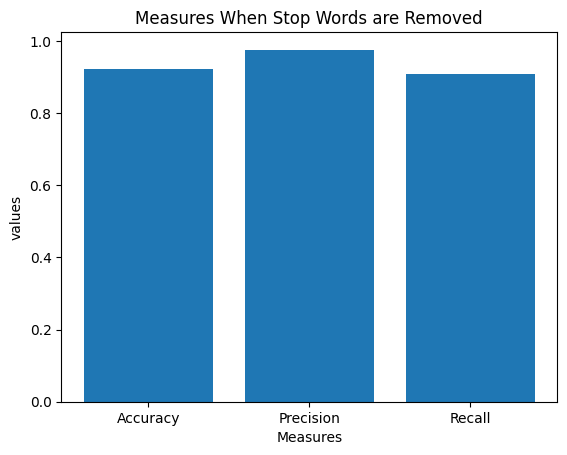

In [71]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [accuracy, precision, recall]

plt.bar(x_axis, y_axis)
plt.title('Measures When Stop Words are Removed')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()

### To show accuracy, precision, and recall without removing stop words it will give us  

In [97]:
# Read stop words from file
with open("C:\\Users\\jjadr\\Documents\\4TH YEAR\\CMSC 197 - Machine Learning\\hw4-adricula\\stop_words.txt") as f:
    stop_words = f.read().splitlines()  

with_stopwords = {'folder':[], 'body':[]}  

# Open folders to access body of email 
for path in df_labels['folder']:
    with_stopwords['folder'].append(path)  # Append folder to the correct dictionary
    # Default encoding is set to ISO-8859-1
    with open(f"C:\\Users\\jjadr\\Documents\\4TH YEAR\\CMSC 197 - Machine Learning\\hw4-adricula\\data\\{path}", encoding='ISO-8859-1') as f:
        message = ""   # Store the email 
        email_message = email.message_from_file(f) 

        # Multipart email 
        if email_message.is_multipart():
            for payload in email_message.walk():
                # If current message is text or plain 
                if payload.get_content_type() == "text/plain": 
                    # Set the message to lowercase 
                    message = payload.get_payload().lower()  
                    break
        else:
            message = email_message.get_payload().lower()
        
        # Clean email 
        new_list = clean_data(message)
        with_stopwords['body'].append(new_list)  # Append cleaned data to the correct dictionary

    storage = []   # Store the cleaned words
    for word in message.split():
        var = re.sub('<[^<>]+>','', word)  # Remove html tags
        var = re.sub('[^a-z]','', var)  # Remove special characters and numbers
        if var != "" and var not in stop_words: # Remove words in stop words  
            storage.append(var)

    new_list = " ".join(storage)  # Change message to a string format 
    with_stopwords['body'].append(new_list)  # Corrected dictionary name


In [101]:
# Shows a datadframe with stop words/unclead data  
with_stopwords_body = pd.DataFrame.from_dict(body)
df_with_stop_words = pd.merge(df_labels, with_stopwords_body, on='folder')
df_with_stop_words

,folder,category,body
0,000/000,0,mailing list queried weeks ago running set arc...
1,000/000,0,mailing list queried weeks ago running set arc...
2,000/000,0,mailing list queried weeks ago running set arc...
3,000/001,1,luxury watches buy rolex rolex cartier bvlgari...
4,000/002,1,academic qualifications prestigious nonacc red...
...,...,...,...
37819,126/017,1,great news expec ted infinex ventures infx pri...
37820,126/018,1,oil sector going crazy weekly gift kkpt thing ...
37821,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...
37822,126/020,1,prosperous future increased money earning powe...


In [103]:
# Train set 
df_train_stopwords = df_with_stop_words[df_with_stop_words['folder'] < '071']

# Training set of spam with stopwords 
df_train_spam_stopwords = df_train_stopwords[df_train_stopwords['category'] == 1]
df_train_spam_stopwords = df_train_spam_stopwords.reset_index()
df_train_spam_stopwords  

,index,folder,category,body
0,3,000/001,1,luxury watches buy rolex rolex cartier bvlgari...
1,4,000/002,1,academic qualifications prestigious nonacc red...
2,6,000/004,1,chauncey conferred luscious continued tonsillitis
3,9,000/007,1,nbc today body diet beaches magazines hollywoo...
4,10,000/008,1,oil sector going crazy weekly gift kkpt thing ...
...,...,...,...,...
13772,21296,070/294,1,txtadd
13773,21297,070/295,1,btijclnab binpqnejgmb httpgethighbizez bldb xi...
13774,21298,070/296,1,special offer adobe video collection adobe pre...
13775,21299,070/297,1,doctype html public wcdtd html transitionalen ...


In [105]:
# Training set of ham with stopwords 
df_train_ham_stopwords = df_train_stopwords[df_train_stopwords['category'] == 0]
df_train_ham_stopwords = df_train_ham_stopwords.reset_index()
df_train_ham_stopwords

,index,folder,category,body
0,0,000/000,0,mailing list queried weeks ago running set arc...
1,1,000/000,0,mailing list queried weeks ago running set arc...
2,2,000/000,0,mailing list queried weeks ago running set arc...
3,5,000/003,0,greetings verify subscription planfans list ch...
4,7,000/005,0,quiet quiet well straw poll plan running
...,...,...,...,...
7520,21272,070/270,0,equation generate prime numbers equation theor...
7521,21273,070/271,0,equation generate prime numbers equation theor...
7522,21290,070/288,0,dear dmdx users guidance generating dmdx item ...
7523,21295,070/293,0,built handyboard works great testmotor passes ...


In [107]:
# Test set with stopwrds 
df_test_stopwords = df_with_stop_words[df_with_stop_words['folder'] >= '071']
df_test_stopwords 

,folder,category,body
21302,071/000,1,hesitantly derive perverse satisfaction clodho...
21303,071/001,0,things perform experiment display will remain ...
21304,071/002,1,best offer month viggra ci ialis vaiium xa naa...
21305,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...
21306,071/004,1,special offer adobe video collection adobe pre...
...,...,...,...
37819,126/017,1,great news expec ted infinex ventures infx pri...
37820,126/018,1,oil sector going crazy weekly gift kkpt thing ...
37821,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...
37822,126/020,1,prosperous future increased money earning powe...


In [109]:
# Top 10000 words with stop words
top_10000_stopwords = Counter(" ".join(df_train_stopwords['body']).split()).most_common(10000)
df_top_10000_stopwords = pd.DataFrame(top_10000_stopwords  , columns=['Word', 'Count'])
df_top_10000_stopwords  

,Word,Count
0,bb,16792
1,td,11367
2,will,11329
3,width,7766
4,board,5171
...,...,...
9995,reminded,20
9996,prompts,20
9997,guessed,20
9998,ruby,20


In [113]:
# Count the length of Ham and spam feature matrices dictionaries 
ham_word_counts_stopwords = {unique_word: [0] * len(df_train_ham_stopwords) for unique_word, _ in top_10000_stopwords}
spam_word_counts_stopwords = {unique_word: [0] * len(df_train_spam_stopwords) for unique_word, _ in top_10000_stopwords}

df_ham_word_counts_stopwords = pd.DataFrame(ham_word_counts_stopwords)
df_spam_word_counts_stopwords = pd.DataFrame(spam_word_counts_stopwords)

list_top_10000_stopwords = [key for key, _ in  top_10000_stopwords]

In [115]:
# Ham feature matrix with stop words 
for i in df_train_ham_stopwords.index:
        word_freq = dict(Counter(df_train_ham_stopwords['body'][i].split()))
        for key, val in word_freq.items():
            if key in list_top_10000_stopwords:
                df_ham_word_counts_stopwords.loc[i, key] += val

ham_matrix_stopwords = df_ham_word_counts_stopwords.to_numpy()
ham_matrix_stopwords

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
# Spam feature matrix with stop words 
for i in df_train_spam_stopwords.index:
        word_freq = dict(Counter(df_train_spam_stopwords['body'][i].split()))
        for key, val in word_freq.items():
            if key in list_top_10000_stopwords:
                df_spam_word_counts_stopwords.loc[i, key] += val

spam_matrix_stopwords = df_spam_word_counts_stopwords.to_numpy()
spam_matrix_stopwords

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
# Sum the counts of each word in the ham and spam classes
ham_word_count_stopwords = ham_matrix_stopwords.sum(axis=0)
spam_word_count_stopwords = spam_matrix_stopwords.sum(axis=0)

# Total number of words in ham and spam classes with stopwords
ham_stopword_total = ham_word_count_stopwords.sum()
spam_stopword_total = spam_word_count_stopwords.sum()

# Initialize dictionaries to hold word probabilities given ham or spam class
likelihood_ham_stopwords = dict()
likelihood_spam_stopwords = dict()

# Laplace smoothing factor
laplace_smoothing = 1
num_uni = len(list_top_10000_stopwords) # Number of unique words

# Compute the probabilities of each word in the ham and spam classes
for word_idx, word in enumerate(list_top_10000_stopwords):
    # Probability of word given ham with stopwords
    temp_prob_ham_stopwords = (ham_word_count_stopwords[word_idx] + laplace_smoothing) / (ham_stopword_total + laplace_smoothing * num_uni)
    
    # Probability of word given spam with stopwords
    temp_prob_spam_stopwords = (spam_word_count_stopwords[word_idx] + laplace_smoothing) / (spam_stopword_total + laplace_smoothing * num_uni)
    
    # Store the probabilities with stopwords in the dictionaries 
    likelihood_ham_stopwords[word] = temp_prob_ham_stopwords
    likelihood_spam_stopwords[word] = temp_prob_spam_stopwords 

In [126]:
# Testing Classifier with stopwords 
predicted_labels_stopwords = {'folder':[], 'predicted':[]}

for file_path, message in zip(test['folder'], test['body']):
    predicted_labels_stopwords['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_stopwords, likelihood_spam_stopwords, list_top_10000_stopwords)
    predicted_labels_stopwords['predicted'].append(classify)

df_test_predicted_stopwords = pd.DataFrame.from_dict(predicted_labels_stopwords)
df_test_results_stopwords = pd.merge(df_test_stopwords, df_test_predicted_stopwords, on='folder')
df_test_results_stopwords

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [128]:
# Get labels of the test set
test_labels_real = df_test_results_stopwords['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_stopwords)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_stopwords['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_stopwords['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_stopwords['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_stopwords['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy_stopwords = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision_stopwords = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall_stopwords = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy without removing stop words: {accuracy_stopwords:.4f}")
print(f"Precision without removing stop words: {precision_stopwords:.4f}")
print(f"Recall without removing stop words: {recall_stopwords:.4f}")

Accuracy without removing stop words: 0.9216
Precision without removing stop words: 0.9765
Recall without removing stop words: 0.9054


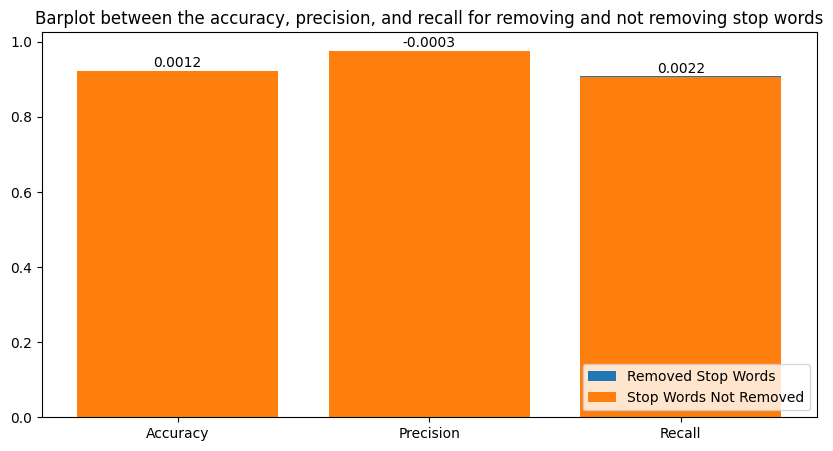

In [134]:
# Plot them in the graph 
# Accuracy, precision, and recall with removing stopwords 
accuracy_cleaned = accuracy
precision_cleaned = precision
recall_cleaned = recall

plt.figure(figsize=(10, 5))
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_cleaned, precision_cleaned, recall_cleaned], label='Removed Stop Words')
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_stopwords, precision_stopwords, recall_stopwords], label='Stop Words Not Removed')
plt.text(x=0, y=accuracy_cleaned + 0.01, s=f"{accuracy_cleaned - accuracy_stopwords:.4f}", ha='center')
plt.text(x=1, y=precision_cleaned + 0.01, s=f"{precision_cleaned - precision_stopwords:.4f}", ha='center')
plt.text(x=2, y=recall_cleaned + 0.01, s=f"{recall_cleaned - recall_stopwords:.4f}", ha='center')
plt.title('Barplot between the accuracy, precision, and recall for removing and not removing stop words')
plt.legend(loc='lower right')
plt.show()

Removing stop words in my end had a minimal effect on the overal accuracy, precision (which dropped), and recall. These findings indicates that with removing stop words has an effeect in the model's overall ability to correctly identify spam and ham emails where it improve accuracy, and recall however, precision in my end maintains a high precision. 

## 2. Experiment on the number of words used for training. 

##### k = 50 

In [148]:
top_10000_words = pd.DataFrame(top_10000_words, columns=['Word', 'Count'])

# Filter words with count >= 50
top_50_words = top_10000_words[top_10000_words['Count'] >= 50]

# Convert the Word column to a list
get_50 = top_50_words['Word'].tolist()  
get_50

['bb',
 'td',
 'will',
 'width',
 'board',
 'size',
 'price',
 'company',
 'gold',
 'email',
 'list',
 'time',
 'nil',
 'help',
 'font',
 'send',
 'message',
 'dont',
 'subject',
 'adobe',
 'crustl',
 'border',
 'received',
 'program',
 'work',
 'professional',
 'wrote',
 'ms',
 'well',
 'good',
 'china',
 'height',
 'number',
 'widthfont',
 'university',
 'color',
 'problem',
 'file',
 'stock',
 'handyboard',
 'bit',
 'hb',
 'de',
 'office',
 'corp',
 'info',
 'windows',
 'add',
 'microsoft',
 'current',
 'studies',
 'pro',
 'contenttype',
 'news',
 'code',
 'development',
 'find',
 'womens',
 'great',
 'people',
 'pt',
 'today',
 'read',
 'system',
 'best',
 'power',
 'save',
 'motor',
 'call',
 'ic',
 'fax',
 'text',
 'table',
 'handy',
 'days',
 'unsubscribe',
 'data',
 'address',
 'ive',
 'body',
 'set',
 'mail',
 'market',
 'site',
 'free',
 'textplain',
 'faceverdana',
 'better',
 'life',
 'meta',
 'cellpadding',
 'additional',
 'xp',
 'oil',
 'day',
 'offer',
 'reviews',
 'web'

In [150]:
# Create ham and spam word counts
ham_word_counts_50 = {unique_word: [0] * len(train_ham) for unique_word in get_50}
spam_word_counts_50 = {unique_word: [0] * len(train_spam) for unique_word in get_50}

df_ham_word_counts_50 = pd.DataFrame(ham_word_counts_50)
df_spam_word_counts_50 = pd.DataFrame(spam_word_counts_50)

In [152]:
# Ham 
for i in train_ham.index:
        word_freq = dict(Counter(train_ham['body'][i].split()))
        for key, val in word_freq.items():
            if key in get_50:
                df_ham_word_counts_50.loc[i, key] += val

ham_matrix_50 = df_ham_word_counts_50.to_numpy()
ham_matrix_50

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [154]:
# Spam
for i in train_spam.index:
        word_freq = dict(Counter(train_spam['body'][i].split()))
        for key, val in word_freq.items():
            if key in get_50:
                df_spam_word_counts_50.loc[i, key] += val

spam_matrix_50 = df_spam_word_counts_50.to_numpy()
spam_matrix_50

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [156]:
# Sum the counts of each word in the ham and spam classes
ham_word_count_50 = ham_matrix_50.sum(axis=0)
spam_word_count_50 = spam_matrix_50.sum(axis=0)

# Total number of words in ham and spam classes 50 w
ham_50_total = ham_word_count_50.sum()
spam_50_total = spam_word_count_50.sum()

likelihood_ham_50 = dict()
likelihood_spam_50 = dict()

# Laplace smoothing factor
laplace_smoothing = 1
num_uni = len(get_50) # Number of unique words


for word_idx, word in enumerate(get_50):
    temp_prob_ham_50 = (ham_word_count_50[word_idx] + laplace_smoothing) / (ham_50_total + laplace_smoothing * num_uni)
    
    temp_prob_spam_50 = (spam_word_count_50[word_idx] + laplace_smoothing) / (spam_50_total + laplace_smoothing * num_uni)
    
    likelihood_ham_50[word] = temp_prob_ham_50
    likelihood_spam_50[word] = temp_prob_spam_50

In [175]:
# Classify emails that occured 50 times 
predicted_labels_50 = {'folder':[], 'predicted':[]}

for file_path, message in zip(test['folder'], test['body']):
    predicted_labels_50['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_50, likelihood_spam_50, get_50)
    predicted_labels_50['predicted'].append(classify)

df_test_predicted_50 = pd.DataFrame.from_dict(predicted_labels_50)
df_test_result_50 = pd.merge(test, df_test_predicted_50, on='folder')
df_test_result_50

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [201]:
# Get labels of the test set
test_labels_real = df_test_result_50['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_50)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_50['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_50['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_50['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_50['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy with 50: {accuracy:.4f}")
print(f"Precision with 50: {precision:.4f}")
print(f"Recall with 50: {recall:.4f}")

Accuracy with 50: 0.9238
Precision with 50: 0.9747
Recall with 50: 0.9106


# For k = 100

In [181]:
top_10000_words = pd.DataFrame(top_10000_words, columns=['Word', 'Count'])

# Filter words with count > 100
top_100_words = top_10000_words[top_10000_words['Count'] > 100]

# Convert the Word column to a list
get_100 = top_100_words['Word'].tolist()  
get_100

['bb',
 'td',
 'will',
 'width',
 'board',
 'size',
 'price',
 'company',
 'gold',
 'email',
 'list',
 'time',
 'nil',
 'help',
 'font',
 'send',
 'message',
 'dont',
 'subject',
 'adobe',
 'crustl',
 'border',
 'received',
 'program',
 'work',
 'professional',
 'wrote',
 'ms',
 'well',
 'good',
 'china',
 'height',
 'number',
 'widthfont',
 'university',
 'color',
 'problem',
 'file',
 'stock',
 'handyboard',
 'bit',
 'hb',
 'de',
 'office',
 'corp',
 'info',
 'windows',
 'add',
 'microsoft',
 'current',
 'studies',
 'pro',
 'contenttype',
 'news',
 'code',
 'development',
 'find',
 'womens',
 'great',
 'people',
 'pt',
 'today',
 'read',
 'system',
 'best',
 'power',
 'save',
 'motor',
 'call',
 'ic',
 'fax',
 'text',
 'table',
 'handy',
 'days',
 'unsubscribe',
 'data',
 'address',
 'ive',
 'body',
 'set',
 'mail',
 'market',
 'site',
 'free',
 'textplain',
 'faceverdana',
 'better',
 'life',
 'meta',
 'cellpadding',
 'additional',
 'xp',
 'oil',
 'day',
 'offer',
 'reviews',
 'web'

In [183]:
# Create ham and spam word counts
ham_word_counts_100 = {unique_word: [0] * len(train_ham) for unique_word in get_100}
spam_word_counts_100 = {unique_word: [0] * len(train_spam) for unique_word in get_100}

df_ham_word_counts_100 = pd.DataFrame(ham_word_counts_100)
df_spam_word_counts_100 = pd.DataFrame(spam_word_counts_100)

In [185]:
# Ham 
for i in train_ham.index:
        word_freq = dict(Counter(train_ham['body'][i].split()))
        for key, val in word_freq.items():
            if key in get_100:
                df_ham_word_counts_100.loc[i, key] += val

ham_matrix_100 = df_ham_word_counts_100.to_numpy()
ham_matrix_100

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [189]:
# Spam
for i in train_spam.index:
        word_freq = dict(Counter(train_spam['body'][i].split()))
        for key, val in word_freq.items():
            if key in get_100:
                df_spam_word_counts_100.loc[i, key] += val

spam_matrix_100 = df_spam_word_counts_100.to_numpy()
spam_matrix_100

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [196]:
# Sum the counts of each word in the ham and spam classes
ham_word_count_100 = ham_matrix_100.sum(axis=0)
spam_word_count_100 = spam_matrix_100.sum(axis=0)

ham_100_total = ham_word_count_100.sum()
spam_100_total = spam_word_count_100.sum()

likelihood_ham_100 = dict()
likelihood_spam_100 = dict()

# Laplace smoothing factor
laplace_smoothing = 1
num_uni = len(get_100) # Number of unique words


for word_idx, word in enumerate(get_100):
    temp_prob_ham_100 = (ham_word_count_100[word_idx] + laplace_smoothing) / (ham_100_total + laplace_smoothing * num_uni)
    
    temp_prob_spam_100 = (spam_word_count_100[word_idx] + laplace_smoothing) / (spam_100_total + laplace_smoothing * num_uni)
    
    likelihood_ham_100[word] = temp_prob_ham_100
    likelihood_spam_100[word] = temp_prob_spam_100

In [198]:
# Classify emails that occured 50 times 
predicted_labels_100 = {'folder':[], 'predicted':[]}

for file_path, message in zip(test['folder'], test['body']):
    predicted_labels_100['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_100, likelihood_spam_100, get_100)
    predicted_labels_100['predicted'].append(classify)

df_test_predicted_100 = pd.DataFrame.from_dict(predicted_labels_100)
df_test_result_100 = pd.merge(test, df_test_predicted_100, on='folder')
df_test_result_100

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [205]:
# Get labels of the test set
test_labels_real = df_test_result_100['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_50)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_100['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_100['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_100['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_100['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy with 100: {accuracy:.4f}")
print(f"Precision with 100: {precision:.4f}")
print(f"Recall with 100: {recall:.4f}")

Accuracy with 100: 0.9173
Precision with 100: 0.9718
Recall with 100: 0.9035


The results indicate that using 50 words for training yields higher accuracy (0.9238), precision (0.9747), and recall (0.9106) compared to using 100 words, where accuracy decreases to 0.9173, precision to 0.9718, and recall to 0.9035. This implies that by lowering input from less important features, a more condensed and targeted word improves the model's performance.

## 3: Using different parameters for Lambda smoothing where $\lambda$ = 2.0, 1.0, 0.5, 0.1, 0.005).  

## Evaluate performance metrics for each. 

In [218]:
# Lambda smoothing function 
def lambda_smoothing(laplace_val, ham_matrix, spam_matrix, word_list):

    # Sum the counts of each word in the ham and spam classes
    ham_word_count = ham_matrix.sum(axis=0)
    spam_word_count = spam_matrix.sum(axis=0)

    # Total number of words in ham and spam classes
    ham_word_total = ham_word_count.sum()
    spam_word_total = spam_word_count.sum()

    likelihood_ham = {}
    likelihood_spam = {}

    for i in range(len(word_list)):
        temp_prob_ham = (ham_word_count[i]+ laplace_val) / (ham_word_total + laplace_val*len(word_list))
        temp_prob_spam = (spam_word_count[i]+laplace_val) / (spam_word_total + laplace_smoothing*len(word_list))
        likelihood_ham[word_list[i]] = temp_prob_ham
        likelihood_spam[word_list[i]] = temp_prob_spam
    
    return likelihood_ham, likelihood_spam

In [215]:
# Evaluate metric performance 
def perf_eval(label, predicted_label):
    accuracy_perf = accuracy_eval(label, predicted_label)
    precision_perf = precision_eval(label, predicted_label)
    recall_perf = recall_eval(label, predicted_label)

    return accuracy_perf, precision_perf, recall_perf

###  $\lambda$ = 2.0

In [226]:
# laplace_val = 2
likelihood_ham_2, likelihood_spam_2 = lambda_smoothing(2, ham_matrix, spam_matrix, lists_top_10000_words)

predicted_test_2 = {'folder':[], 'predicted':[]}
for file_path, message in zip(test['folder'], test['body']):
    predicted_test_2['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_2, likelihood_spam_2, lists_top_10000_words)
    predicted_test_2['predicted'].append(classify)

df_test_predicted_2 = pd.DataFrame.from_dict(predicted_test_2)
df_test_result_2 = pd.merge(test, df_test_predicted_2, on='folder')
df_test_result_2

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [260]:
# Performance Metrics 
# Get labels of the test set
test_labels_real = df_test_result_2['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_2)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_2['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_2['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_2['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_2['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy2 = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision2 = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall2 = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")

Accuracy: 0.9229
Precision: 0.9758
Recall: 0.9081


### $\lambda$ = 1.0

In [236]:
# laplace_val = 1
likelihood_ham_1, likelihood_spam_1 = lambda_smoothing(1, ham_matrix, spam_matrix, lists_top_10000_words)

predicted_test_1 = {'folder':[], 'predicted':[]}
for file_path, message in zip(test['folder'], test['body']):
    predicted_test_1['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_1, likelihood_spam_1, lists_top_10000_words)
    predicted_test_1['predicted'].append(classify)

df_test_predicted_1 = pd.DataFrame.from_dict(predicted_test_1)
df_test_result_1 = pd.merge(test, df_test_predicted_1, on='folder')
df_test_result_1

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [262]:
# Performance Metrics 
# Get labels of the test set
test_labels_real = df_test_result_1['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_1)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_1['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_1['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_1['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_1['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy1 = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision1 = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall1 = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")

Accuracy: 0.9228
Precision: 0.9761
Recall: 0.9076


### $\lambda$ = 0.5

In [242]:
# laplace_val = 0.5
likelihood_ham_05, likelihood_spam_05 = lambda_smoothing(0.5, ham_matrix, spam_matrix, lists_top_10000_words)

predicted_test_05 = {'folder':[], 'predicted':[]}
for file_path, message in zip(test['folder'], test['body']):
    predicted_test_05['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_05, likelihood_spam_05, lists_top_10000_words)
    predicted_test_05['predicted'].append(classify)

df_test_predicted_05 = pd.DataFrame.from_dict(predicted_test_05)
df_test_result_05 = pd.merge(test, df_test_predicted_05, on='folder')
df_test_result_05

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [264]:
# Performance Metrics 
# Get labels of the test set
test_labels_real = df_test_result_05['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_05)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_05['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_05['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_05['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_05['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy05 = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision05 = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall05 = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy: {accuracy05:.4f}")
print(f"Precision: {precision05:.4f}")
print(f"Recall: {recall05:.4f}")

Accuracy: 0.9226
Precision: 0.9764
Recall: 0.9071


### $\lambda$ = 0.1

In [247]:
# laplace_val = 0.1
likelihood_ham_01, likelihood_spam_01 = lambda_smoothing(0.1, ham_matrix, spam_matrix, lists_top_10000_words)

predicted_test_01 = {'folder':[], 'predicted':[]}
for file_path, message in zip(test['folder'], test['body']):
    predicted_test_01['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_01, likelihood_spam_01, lists_top_10000_words)
    predicted_test_01['predicted'].append(classify)

df_test_predicted_01 = pd.DataFrame.from_dict(predicted_test_01)
df_test_result_01 = pd.merge(test, df_test_predicted_01, on='folder')
df_test_result_01

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [266]:
# Performance Metrics 
# Get labels of the test set
test_labels_real = df_test_result_01['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_01)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_01['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_01['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_01['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_01['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy01 = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision01 = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall01 = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy: {accuracy01:.4f}")
print(f"Precision: {precision01:.4f}")
print(f"Recall: {recall01:.4f}")

Accuracy: 0.9233
Precision: 0.9768
Recall: 0.9077


### $\lambda$ = 0.05

In [255]:
# laplace_val = 0.05
likelihood_ham_005, likelihood_spam_005 = lambda_smoothing(0.05, ham_matrix, spam_matrix, lists_top_10000_words)

predicted_test_005 = {'folder':[], 'predicted':[]}
for file_path, message in zip(test['folder'], test['body']):
    predicted_test_005['folder'].append(file_path)
    classify = classify_emails(message, prob_ham, prob_spam, likelihood_ham_005, likelihood_spam_005, lists_top_10000_words)
    predicted_test_005['predicted'].append(classify)

df_test_predicted_005 = pd.DataFrame.from_dict(predicted_test_005)
df_test_result_005 = pd.merge(test, df_test_predicted_005, on='folder')
df_test_result_005

,folder,category,body,predicted
0,071/000,1,hesitantly derive perverse satisfaction clodho...,1
1,071/001,0,things perform experiment display will remain ...,0
2,071/002,1,best offer month viggra ci ialis vaiium xa naa...,1
3,071/003,1,de ar wne cr doesnt matter ow real st mmed ia ...,1
4,071/004,1,special offer adobe video collection adobe pre...,1
...,...,...,...,...
16517,126/017,1,great news expec ted infinex ventures infx pri...,1
16518,126/018,1,oil sector going crazy weekly gift kkpt thing ...,1
16519,126/019,1,httpvdtobjdocscaninfo suffering pain depressio...,1
16520,126/020,1,prosperous future increased money earning powe...,1


In [276]:
# Performance Metrics 
# Get labels of the test set
test_labels_real = df_test_result_005['category'].to_numpy()  

# Initialize counters 
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

# Loop through the test classifications and compare with real labels
for i in range(len(df_test_predicted_005)):
    # 1 = Spam
    if test_labels_real[i] == 1 and df_test_predicted_005['predicted'][i] == 1:  
        true_positive += 1
    # 0 = Ham
    elif test_labels_real[i] == 1 and df_test_predicted_005['predicted'][i] == 0:  
        false_negative += 1
    # 0 = Ham
    elif test_labels_real[i] == 0 and df_test_predicted_005['predicted'][i] == 0:  
        true_negative += 1
    # 1 = Spam
    elif test_labels_real[i] == 0 and df_test_predicted_005['predicted'][i] == 1:  
        false_positive += 1

# Calculate metrics
accuracy005 = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision005 = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall005 = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Accuracy: {accuracy005:.4f}")
print(f"Precision: {precision005:.4f}")
print(f"Recall: {recall005:.4f}")

Accuracy: 0.9233
Precision: 0.9768
Recall: 0.9077


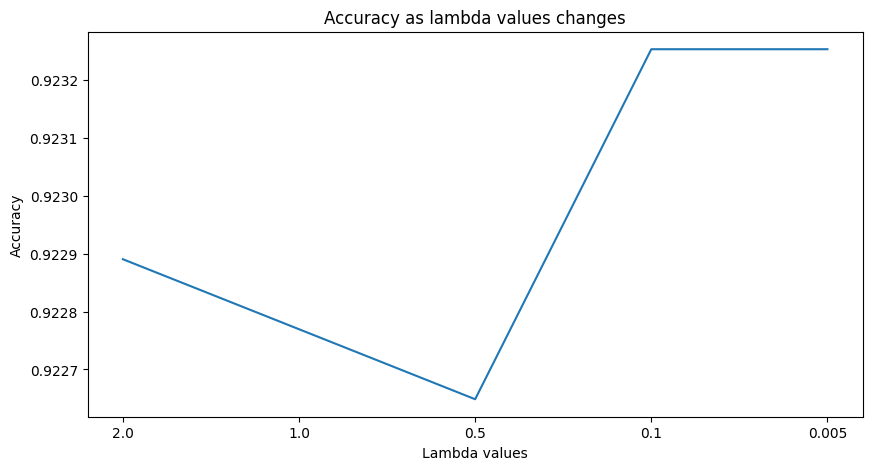

In [280]:
# Plot of the accuracy as lambda values changes
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(['2.0', '1.0', '0.5', '0.1', '0.005'], [accuracy2, accuracy1, accuracy05, accuracy01, accuracy005])
ax.set_title('Accuracy as lambda values changes', fontsize=12)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Lambda values')
plt.show()

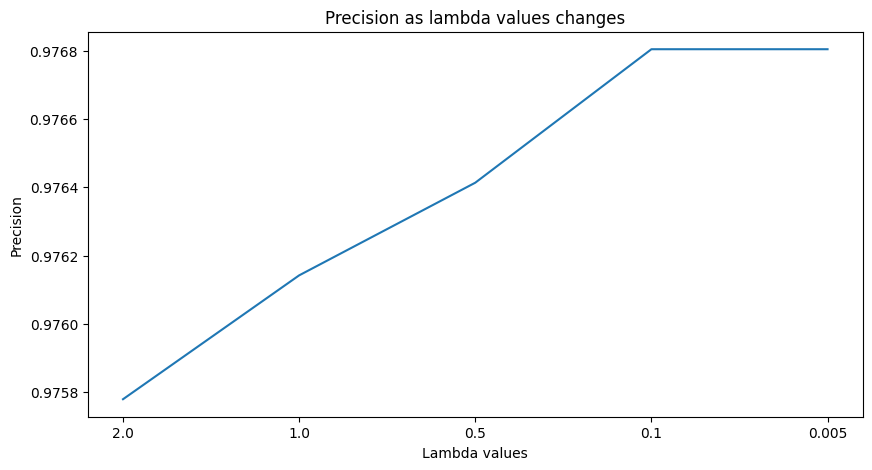

In [282]:
# Plot of the precision as lambda values changes
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(['2.0', '1.0', '0.5', '0.1', '0.005'], [precision2, precision1, precision05, precision01, precision005])
ax.set_title('Precision as lambda values changes', fontsize=12)
ax.set_ylabel('Precision')
ax.set_xlabel('Lambda values')
plt.show()

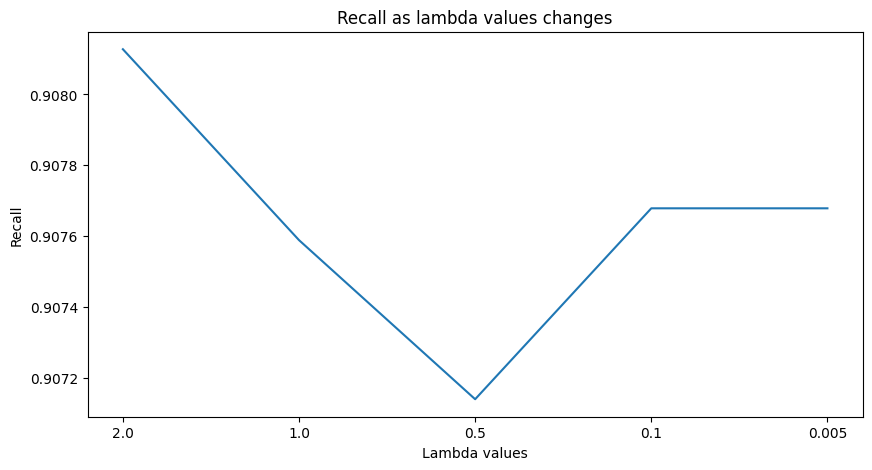

In [284]:
# Plot of the recall as lambda values changes
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(['2.0', '1.0', '0.5', '0.1', '0.005'], [recall2, recall1, recall05, recall01, recall005])
ax.set_title('Recall as lambda values changes', fontsize=12)
ax.set_ylabel('Recall')
ax.set_xlabel('Lambda values')
plt.show()

The findings indicate that there is little effect on overall performance in my model when adjusting the λ (Lambda) values for smoothing. While precision significantly decreases, accuracy and recall are slightly higher at λ = 2.0 than at λ = 1.0. Accuracy, precision, and recall all alter very little as λ goes down; findings from λ = 0.1 and λ = 0.05 are the same. The best overall balance in performance metrics is produced by smaller λ values (e.g., 0.1 and 0.05), even though the benefits are insignificant for all tested values.

 ## 4.  What are your recommendations to further improve the model? 

To further improve the model, we can try capturing word importance beyond frequency with more advanced feature extraction methods. Another thing is that we could try to eliminate additional noise from the data, including uncommon or very frequent terms that aren't stop words to further condensed the email content. Lastly, we need to figure out how to speed up the model's execution, especially when dealing with a big number of emails, as using scratch takes too long to run. 